<a href="https://colab.research.google.com/github/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/blob/master/Diabetes_set_(Decision_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [2]:
url = 'https://raw.githubusercontent.com/webshredder/CS7641-Assigment1/main/winequalityN.csv'
df = pd.read_csv(url,on_bad_lines='skip')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#feature variables
x=df.drop(['quality'], axis=1)
#target variable
y=df.quality

In [4]:
# Import 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [5]:
# Normalize the data and split into train/test sets
sc = StandardScaler()
xt = sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(xt, y, test_size=0.2, random_state=41, stratify=y)


In [6]:
#Loop through k
accuracy = []
knn = range(1, 40)

for k in knn:
      #Create kNN classifer object that votes
      model = KNeighborsClassifier(n_neighbors=k)
      # fit kNN classifer - "fit" here means to memorize the data since kNN is a lazy learner
      model = model.fit(x_train,y_train)

      #print results
      acc = metrics.accuracy_score(y_test,  model.predict(x_test))
      accuracy.append(acc)





In [7]:
dw_accuracy = []
knn = range(1, 40)

for k in knn:
      #Create kNN classifer object that votes
      model = KNeighborsClassifier(n_neighbors=k, weights='distance')
      # fit kNN classifer - "fit" here means to memorize the data since kNN is a lazy learner
      model = model.fit(x_train,y_train)

      #print results
      acc = metrics.accuracy_score(y_test,  model.predict(x_test))
      dw_accuracy.append(acc)





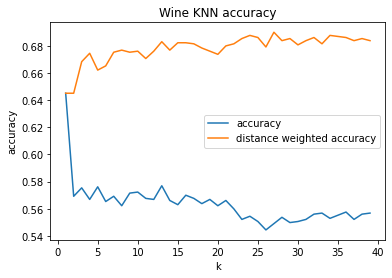

In [9]:
pyplot.plot(knn, accuracy, label='accuracy')
pyplot.plot(knn, dw_accuracy, label = 'distance weighted accuracy')
pyplot.title('Wine KNN accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('k')
pyplot.legend(loc='best')
pyplot.show()